In [27]:
from sklearn.model_selection import train_test_split
from predict import load_train, load_test

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ConfusionMatrix

import matplotlib.pyplot as plt

In [2]:
X, y = load_train()
test_x, test_y = load_test()

classes = ["Not Occupied", "Occupied"]

/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


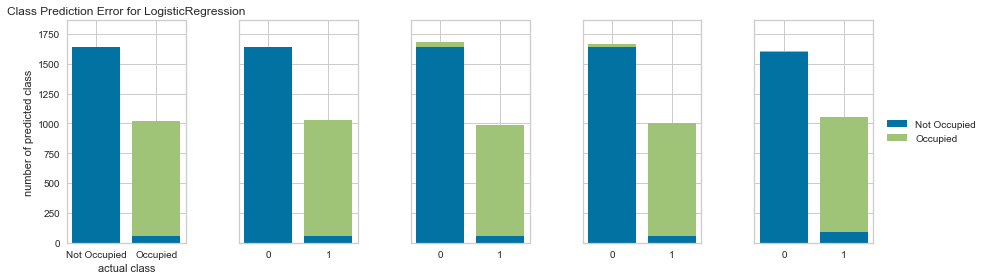

In [17]:
_, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(16, 4))

# Instantiate the classification model and visualizer
visualizer0 = ClassPredictionError(
    LogisticRegression(), ax=ax0, classes=classes)

visualizer1 = ClassPredictionError(
    GaussianNB(), ax=ax1, classes=classes)

visualizer2 = ClassPredictionError(
    RandomForestClassifier(n_estimators=1000, n_jobs=6), ax=ax2, classes=classes)

visualizer3 = ClassPredictionError(
    GradientBoostingClassifier(), ax=ax3, classes=classes)

visualizer4 = ClassPredictionError(
    SVC(), ax=ax4, classes=classes)

# Fit the training data to the visualizer
visualizer0.fit(X, y)
visualizer1.fit(X, y)
visualizer2.fit(X, y)
visualizer3.fit(X, y)
visualizer4.fit(X, y)

# Evaluate the model on the test data
s0 = visualizer0.score(test_x, test_y)
s1 = visualizer1.score(test_x, test_y)
s2 = visualizer2.score(test_x, test_y)
s3 = visualizer3.score(test_x, test_y)
s4 = visualizer4.score(test_x, test_y)

g0 = visualizer0.poof()


/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


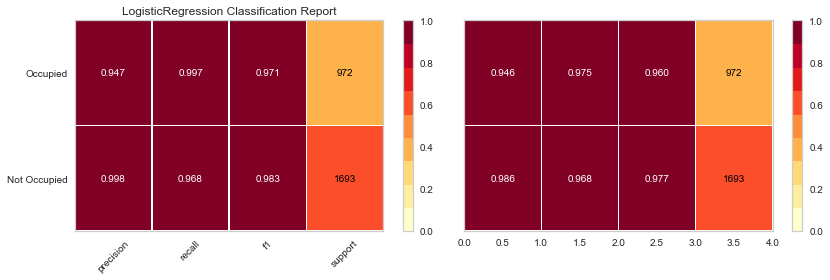

In [31]:
_, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 4))
visualizer5 = ClassificationReport(LogisticRegression(), ax=ax0, classes=classes, support=True)
visualizer6 = ClassificationReport(GradientBoostingClassifier(), ax=ax1, classes=classes, support=True)

visualizer5.fit(X, y)
visualizer6.fit(X, y)

visualizer5.score(test_x, test_y)
visualizer6.score(test_x, test_y)

visualizer5.poof()


/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


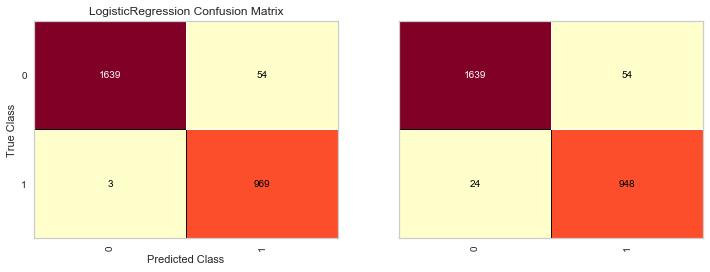

In [32]:
_, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,4))

encoder = LabelEncoder()
encoder.fit_transform(y)

cm1 = ConfusionMatrix(LogisticRegression(), ax=ax0, classes=[0,1])
cm2 = ConfusionMatrix(GradientBoostingClassifier(), ax=ax1, classes=[0,1])

cm1.fit(X, y)
cm2.fit(X, y)

cm1.score(test_x, test_y)
cm2.score(test_x, test_y)

cm1.poof()
